In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Algunas tranformadas importantes:

## Ejemplo:

$$x[n]=\delta[n]$$
$$x[n] \rightarrow TDF \rightarrow X[e^{jwn}]$$
impulso unitario centrado, a destacar vemos que el espectro de magnitud $|X[e^{jwn}]|=1$  y la fase $arctan\left(\dfrac{Img(X[n])}{Re(X[n])} \right)$

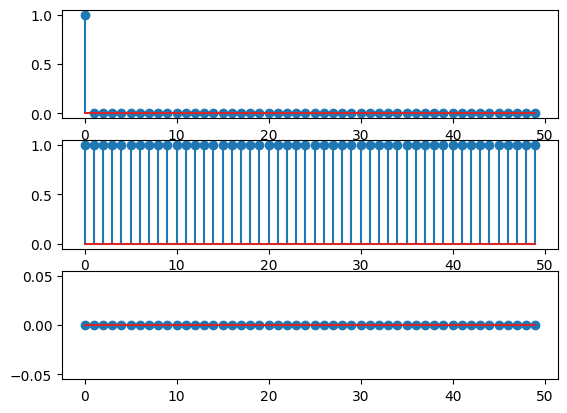

In [24]:
x=np.zeros(50)
x[0]=1

X=np.fft.fft(x)

fig,ax=plt.subplots(3)
ax[0].stem(x)
ax[1].stem(np.abs(X))
ax[2].stem(np.arctan(np.imag(X)/np.real(X)))


plt.show()

## Ejemplo:

$$x[n]=\delta[n-n_0]$$

$$x[n] \rightarrow TDF \rightarrow X[e^{jwn}]$$

$$X[w]= \sum^{\infty}_{n=-\infty}{\delta[n-n_0]}e^{-jwn}$$

$$X[w]=(1)e^{-jwn_0}$$

en el impulso unitario desfasado en el tiempo vemos que la magnitud sigue siendo $|X[e^{jwn}]|=1$ 

recordar que el termino $e^{-jwn_0}$ tiene modulo 1, y va indicando como se modifica la fase que no es otra cosa que 
$-wn_0$ por tanto $n0$ será la pendiente de nuestra fase.

En el siguiente ejemplo hemos desplazado 2 unidades el impulso unitario.

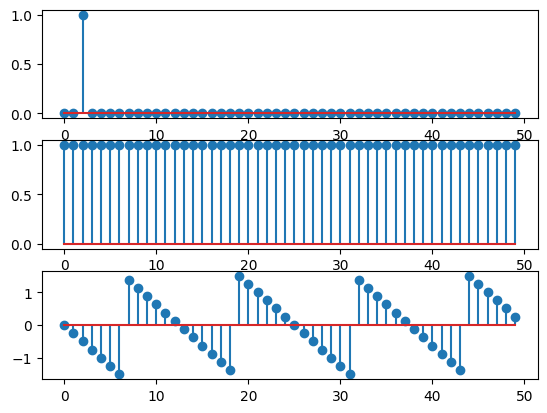

In [4]:
x=np.zeros(50)
x[0]=1

x=np.roll(x,shift=2) # x[n]=delta[n-1]

X=np.fft.fft(x)

fig,ax=plt.subplots(3)
ax[0].stem(x)
ax[1].stem(np.abs(X))
ax[2].stem(np.arctan(np.imag(X)/np.real(X)))


plt.show()

## ejemplo exponencial descreciente:

$$x\left[ n\right] =a^{n}u\left[ n\right] \left| a\right|  <1$$

$$X\left[ \omega \right] =\sum ^{\infty }_{n=-\infty }a^{n}u\left[ n\right] e^{-j\omega n}$$

$$X\left[ \omega \right] =\sum ^{\infty }_{n=0 } [ae^{-j\omega}]^{n}$$

lo cual se resuelve como una serie geometrica:

$$\sum ^{\infty }_{k=0} a^n = \dfrac{1-a^{n+1}}{1-a}$$


si no recuerdan:
consideremos:

$$S= 1 + a + a^2 + a^3 + ... +a^n $$
$$aS= 1.a + a^2 + a^3 + a^4 + ... +a^{n+1} $$

combinando hacemos S-aS:

$$S-aS= 1-a^{n+1} $$
factorizando S:
$$S(1-a)= 1-a^{n+1} $$

$$S= \dfrac{1-a^{n+1}}{1-a} $$


volviendo a nuestro ejemplo:

$$X\left[ \omega \right] =\sum ^{\infty }_{n=0 } [ae^{-j\omega}]^{n}$$

$$a=ae^{-j\omega}$$

por tanto nuestra serie infinita queda:

$$X\left[ \omega \right] =\dfrac{1-a^{n+1}}{1-a}=\dfrac {1-(ae^{-j\omega})^{n+1}}{1-ae^{-j\omega}} $$

siendo que $a^n$ tienda a 0 a medida $n \rightarrow \infty$ y $e^{-j\omega{n}}$ es acotado

$$X\left[ \omega \right] =\dfrac {1-(0)}{1-ae^{-j\omega}}=\dfrac {1}{1-ae^{-j\omega}} $$

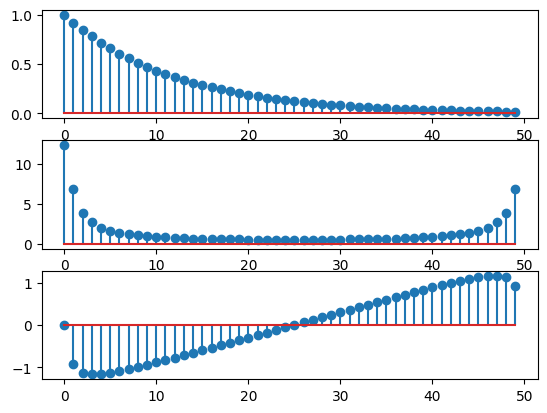

In [5]:
n=np.arange(50) #[0,1,2,3,4...49]
a=0.92

x=np.power(a,n)

X=np.fft.fft(x)


fig,ax=plt.subplots(3)
ax[0].stem(x)
ax[1].stem(np.abs(X))
ax[2].stem(np.arctan(np.imag(X)/np.real(X)))


plt.show()

verifiquemos que $$X\left[ \omega \right] =\dfrac {1-(0)}{1-ae^{-j\omega}}=\dfrac {1}{1-ae^{-j\omega}} $$
tenga la forma esperada:

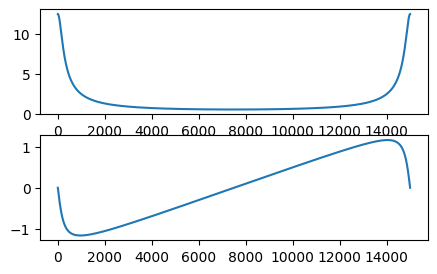

In [6]:
omega=np.linspace(0,2*np.pi,15000)
a=0.92
term= a * np.power(np.e,(-1j*omega))
X=1/(1-(term))

fig, ax = plt.subplots(2,figsize=(5,3))
ax[0].plot(abs(X))
ax[1].plot(np.arctan(X.imag/X.real))
plt.show()

## Ejemplo simple de la transformada inversa:

$$ X(\omega)= \sum ^{\infty}_{k=-\infty} 2\pi\delta(\omega-\omega_0+2\pi k)$$

la transformada invesa nos dice que:

$$x[n]=\dfrac{1}{2\pi}\int^{\pi}_{-\pi}X(\omega)e^{j\omega n} d\omega$$

$$x[n]=\dfrac{1}{2\pi}\int^{\pi}_{-\pi}{\sum ^{\infty}_{k=-\infty} 2\pi\delta(\omega-\omega_0+2\pi k)}e^{j\omega n} d\omega$$

como integramos en un solo intervalo de 2$\pi$ podemos despreciar el $2\pi k$ y adicionalmente la funcion concentra valor en $\omega_0$

$$x[n]=\int^{\pi}_{-\pi}{\delta(\omega-\omega_0)}e^{j\omega n} d\omega = e ^{j\omega_0 n}$$
$$x[n]= e ^{j\omega_0 n} = cos(\omega_0 n) + sin(\omega_0 n) i$$

de aqui debemos identificar que la serie resultante es compleja y esto se debe a que la señal original no tiene un impulso complementario. Como el ejemplo de la transformada de del $cos(nT_s)$ de la clase previa.

$$X\left( f\right) =\sum ^{\infty }_{k=-\infty }\left[ \dfrac{1}{2}\delta \left( f-kf_{0}\right) +\dfrac{1}{2}\delta \left( f+kf_{0}\right) \right] $$

## Pulso Rectangular: (super importante)

$$x[n]=u[n]-u[n-N]$$

$$X(\omega)=\sum^{\infty}_{n=-\infty}{x[n]e^{-j\omega n}}$$
$$X(\omega)=\sum^{N-1}_{n=0}{(1)e^{-j\omega n}}$$

lo podemos pensar como suma fininta

$$X(\omega)=\dfrac{e^{-j\omega(0)}-e^{-j\omega(N-1+1)}}{1-e^{-j\omega}}$$
$$X(\omega)=\dfrac{1-e^{-j\omega(N)}}{1-e^{-j\omega}}$$

lo cual se puede mejorar un poco

$$X(\omega)=\dfrac{e^{-j\omega\dfrac{N}{2}} \left[ e^{j\omega\frac{N}{2}} - e^{-j\omega\frac{N}{2}}  \right] }
                  {e^{-j\dfrac{\omega}{2}}  \left[ e^{j\frac{\omega}{2}} - e^{-j\frac{\omega}{2}}  \right]}$$



$$X(\omega)={e^{-j\omega{\dfrac{N-1}{2}}}}\left[ \dfrac{sin(\omega\dfrac{N}{2})}
                                           {sin(\dfrac{\omega}{2})} \right]$$

donde se usaron las identidades:

$$sin(\alpha)=\dfrac{e^{j\alpha}-e^{-j\alpha}}
              {2j}$$
              
$$cos(\alpha)=\dfrac{e^{j\alpha}+e^{-j\alpha}}
              {2}$$

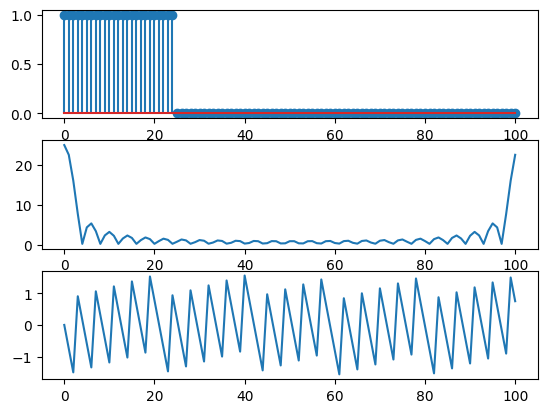

In [7]:
x=np.ones(101)
x[25:]=0

X=np.fft.fft(x)

fig,ax=plt.subplots(3)
ax[0].stem(x)
ax[1].plot(np.abs(X))
ax[2].plot(np.arctan(np.imag(X)/np.real(X)))


plt.show()


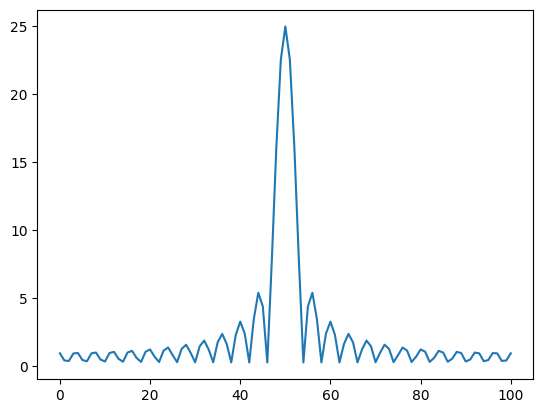

In [8]:
plt.plot(np.roll(np.abs(X),50))
plt.show()

Como ya vimos muestrear equivale a multiplicar una señal continua por un tren de pulsos, este tren de impulsos delta de dirac

$$
\upuparrows(t) = \sum_{m=-\infty}^\infty \delta[t - m / F_s],
$$

siendo $F_s$ la frecuencia de muestreo es decir $1/T_s$


imagen de phuise.github.io

$$
s(t) ~ \cdot \upuparrows(t) = \{s_m\} 
$$

donde $\{s_m\}$ es la secuencia muestreada a partir de $s(t)$. 






Nos interesa entender que ocurre con $S(f)$, el espectro de $s(t)$, cuando se realiza el muestreo. Para verificar esto matematicamente necesitamos conocer la transformada de Fourier del tren de impulsos, que es

$$
\mathbb{FT}[\upuparrows(t)] =  F_s \sum_{m=-\infty}^\infty  \delta(f - m F_s)
$$

es decir **otro tren de impulsos** pero en frecuencia en lugar de tiempo. Pueden revisar la demostración de la transformada anterior [aquí](http://www.thefouriertransform.com/pairs/shah.php)

Con esto tenemos todos los ingredientes para calcular la transformada de Fourier de la señal discreta

$$
\begin{align}
\mathbb{FT}[s(t) \cdot \upuparrows(t)] &= \mathbb{FT}[s(t)] * \mathbb{FT}[\upuparrows(t)] \nonumber \\
&= S(f) *  F_s \sum_{m=-\infty}^\infty  \delta(f - m F_s) \nonumber \\
&= F_s \sum_{m = -\infty}^{\infty} S(f - m F_s) \nonumber
\end{align}
$$

:::{note}

El espectro de la señal discreta es equivalente a una repetición infinita del espectro de la señal continua. Las repeticiones del espectro están separadas en $F_s$ [Hz]

:::

Para obtener el espectro de la señal discreta hemos usado una importante propiedad de la transformada de Fourier: La transformada de Fourier de una multiplicación de señales corresponde a la convolución entre las transformadas de Fourier de cada uno de los términos. 


Recordando la formula de concolución:

$$
(f * g)[n] = \sum_{m=-\infty}^\infty f[m] g[n-m] = \sum_{m=-\infty}^\infty f[n-m] g[m]
$$

La variable $m$ se suele llamar (*lag*). La convolución consiste en sumar la multiplicación de $f$ con versiones retrasadas de $g$ (o viceverza). El resultado de la convolución es una nueva función 

En el caso de que $f$ sea un tren de impulsos ocurrirá una "repetición" de $g$ (o viceverza). La siguiente animación ejemplifica lo anterior con la convolución entre una señal gaussiana y un tren de impulsos con $F_s=2$ [Hz]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
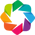

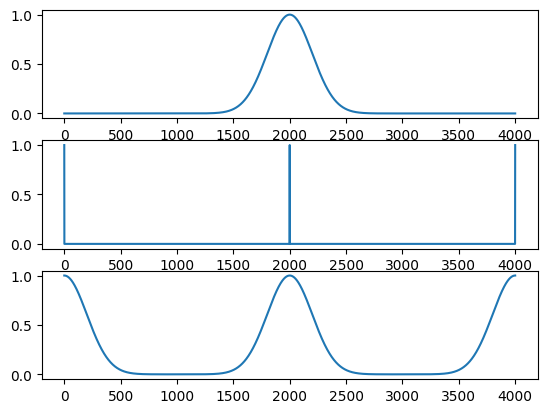

In [25]:
%matplotlib inline
import holoviews as hv
hv.extension('bokeh')
hv.opts.defaults(hv.opts.Curve(width=500))

import numpy as np
import scipy.signal

def señal(t, mu=0, sigma=0.2):
    return np.exp(-0.5*((t-mu)/sigma)**2)

def peineta(t, Fs=2000):
    s = np.zeros_like(t)
    s[::Fs] = 1 
    return s
    
x = np.arange(-2, 2+1e-3, step=1e-3)
conv_s = np.convolve(señal(x), peineta(x), mode='same')

fig,ax=plt.subplots(3)
ax[0].plot(señal(x))
ax[1].plot(peineta(x))
ax[2].plot(conv_s)

In [152]:
x = np.arange(-5, 5, step=0.001)
gauss_time = lambda time, sigma: np.exp(-0.5*(time/sigma)**2)
gauss_freq = lambda freq, sigma: np.exp(-2*(np.pi*freq*sigma)**2)#*(np.sqrt(2*np.pi)*sigma)

In [153]:
gt = hv.HoloMap(kdims=['sigma'])
gf = hv.HoloMap(kdims=['sigma'])

for sigma in [0.25, 1/np.sqrt(2*np.pi), 1]:
    gt[sigma] = hv.Curve((x, gauss_time(x, sigma)), 'Tiempo [s]', 's(t)')
    gf[sigma] = hv.Curve((x, gauss_freq(x, sigma)), 'Frecuencia [Hz]', 'S(f)')
    
(gt + gf).opts(hv.opts.Curve(width=300))

:Layout
   .HoloMap.I  :HoloMap   [sigma]
      :Curve   [Tiempo [s]]   (s(t))
   .HoloMap.II :HoloMap   [sigma]
      :Curve   [Frecuencia [Hz]]   (S(f))

In [150]:
def periodic_gauss_freq(f, sigma, Fs=2):
    # Equivalente a convolucionar la gaussiana con un tren de impulsos
    S = np.zeros_like(f)
    for m in range(-20, 20):
        S += gauss_freq(f - Fs*m, sigma)
    return S

x = np.arange(-5, 5, step=0.001)



In [151]:
espectro_continuo = hv.HoloMap(kdims=['sigma'], sort=False)
espectro_discreto = hv.HoloMap(kdims=['sigma'], sort=False)

for sigma in [1, 1/np.sqrt(2*np.pi), 0.25]:
    espectro_continuo[sigma] = hv.Curve((x, gauss_freq(x, sigma)), 
                                        'Frecuencia [Hz]', 'Espectro', label='Continuo').opts(line_width=4)
    espectro_discreto[sigma] = hv.Curve((x, periodic_gauss_freq(x, sigma)), 
                                        'Frecuencia [Hz]', label='Discreto')
    
(espectro_continuo * espectro_discreto * hv.Box(0, 0.5, (2, 1)).opts(line_dash='dashed', line_width=2, alpha=0.5))


:HoloMap   [sigma]
   :Overlay
      .Curve.Continuo :Curve   [Frecuencia [Hz]]   (Espectro)
      .Curve.Discreto :Curve   [Frecuencia [Hz]]   (y)
      .Box.I          :Box   [x,y]

# Ventaneo: 

podriamos entender un ventaneado discreto si tenemos una ventana $W[n]$ multiplicandose por nuestra señal este caso podria ser como el anterior en donde tenemos una ventana rectangular pero la multiplicariamos por una señal.



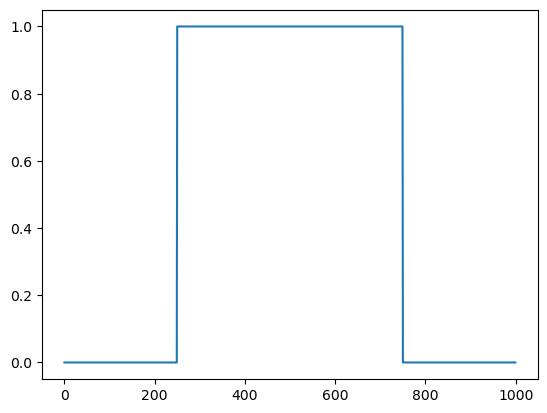

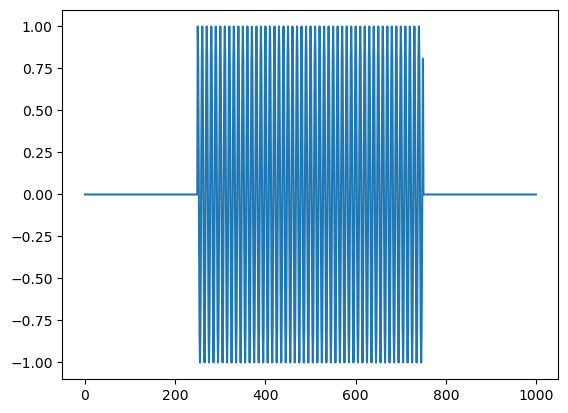

In [135]:
f0=100
fs=1000
tf=1 #segundos
t=np.arange(1000)/fs
x=np.cos(np.pi*2*f0*t)

W=np.zeros(len(x))
W[250:750]=1

plt.plot(W)
plt.show()
xW=x*W

plt.plot(xW)
plt.show()

$$x(nTs)\rightarrow -\infty < n < \infty$$
$$x(nTs)\rightarrow 0 < n < N-1$$

$$X(\omega)=\sum^{\infty}_{n=-\infty} x(n)e^{-jwn} \rightarrow X(\omega)=\sum^{N-1}_{n=0} x(n)e^{-jwn}$$


bueno esto no es gratis en el sentido que podemos intuir que hay menos información en la señal.
Antes tenemos que conocer la propiedad de la convolucion en donde:

**cuando se tiene el producto de dos señales en el tiempo se puede llegar a la misma señal resultado realizando la antitransformada de la convolución de los espectros de dichas señales.**

tambien es cierto:

**cuando se tiene el producto de dos espectros el resultado es igual a la TDF de la convolución de las señales que dieron origen a dichos espectros.**

demostración de la convolucion: [https://www.youtube.com/watch?v=efW9zC965uc&list=WL&index=153]

en este sentido al ventanear la señal tenemos:

$$x_t(nT_s)=x(nT_s)w(nT_s)$$
$$X_t(\omega)=X(\omega)*W(\omega)$$

volvamos con nuestro ejemplo principal:

La obtencion de la ventana rectangular ya la desarrollamos previamente y llegamos a la expresión:
y si nos quedamos con su valro absoluto.
$$
\left|W(\omega)\right| =\left|
\dfrac{sen\left( \dfrac{\omega N}{2} \right) }
{sen\left( \dfrac{\omega}{2} \right) }\right|
$$



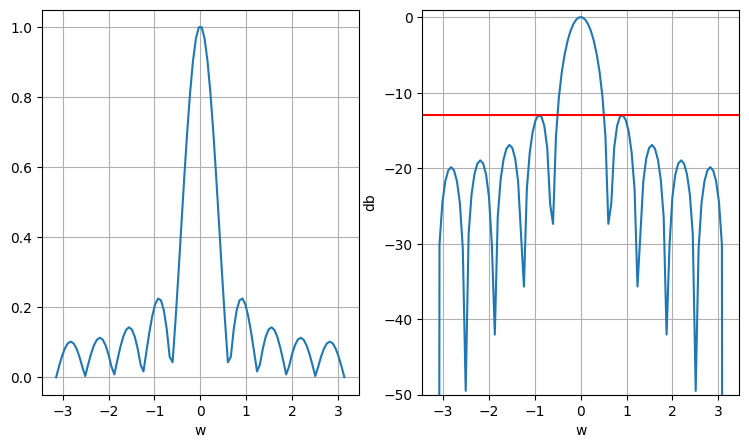

In [74]:
omega= np.linspace(-np.pi,np.pi,100)
N=10
fig, ax = plt.subplots(1,2,figsize=(9,5))

sinn=np.sin((omega*N)/2)
sind=np.sin((omega)/2)

W=np.abs(sinn/sind)
W=W/max(W)

ax[0].plot(omega,W)
ax[1].plot(omega,20*np.log10(W))
#plt.xlim(-1.5,1.5)
ax[1].set_ylim(-50,1)
ax[1].set_ylabel("db")
ax[1].set_xlabel("w")
ax[0].set_xlabel("w")

ax[1].axhline(-13,c="r")
ax[1].grid()
ax[0].grid()

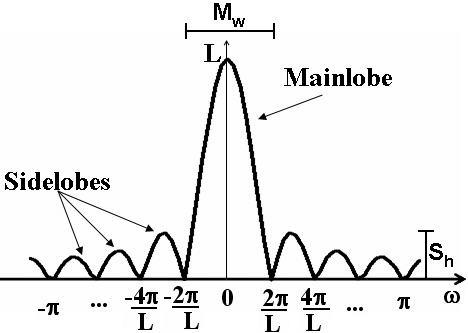

Que ocurre al ir modificando N?

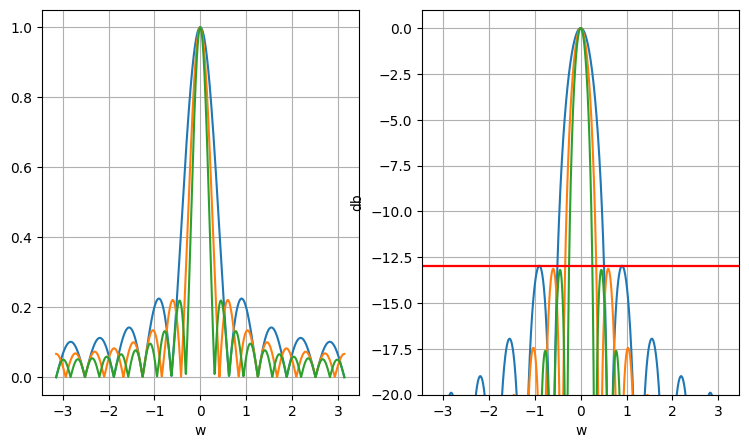

In [80]:
omega= np.linspace(-np.pi,np.pi,1000)


fig, ax = plt.subplots(1,2,figsize=(9,5))

enes= [10, 15, 20]

for N in enes:
    
    sinn=np.sin((omega*N)/2)
    sind=np.sin((omega)/2)

    W=np.abs(sinn/sind)
    W=W/max(W)

    ax[0].plot(omega,W)
    ax[1].plot(omega,20*np.log10(W))
    #plt.xlim(-1.5,1.5)
    ax[1].set_ylim(-20,1)
    ax[1].set_ylabel("db")
    ax[1].set_xlabel("w")
    ax[0].set_xlabel("w")

    ax[1].axhline(-13,c="r")
    ax[1].grid()
    ax[0].grid()

Probemos ahora un ejemplo:

tenemos una suma de dos senales

$$x[n]= cos(2\pi(f_0/f_s)n) + cos(2\pi(f_1/f_s)n)$$

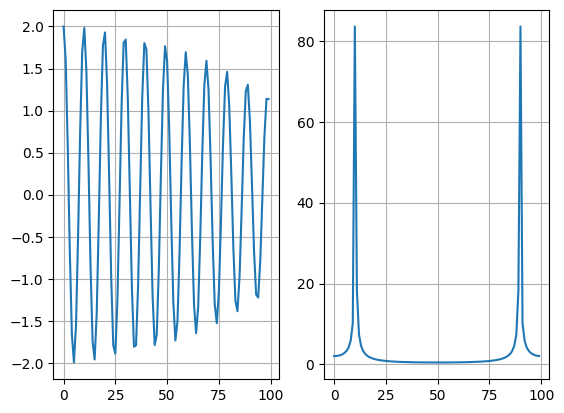

In [88]:
n=np.arange(100)

f0=100
f1=103
fs=1000

x= np.cos(2*np.pi*f0/fs*n)+ np.cos(2*np.pi*f1/fs*n) #suma de 2 senos de 100 y 100 Hz

X=np.fft.fft(x) # el segundo argumento es equivalente a realizar un zero-padding para completar 1000 muestras

fig, ax=plt.subplots(1,2)

ax[0].plot(x)
ax[1].plot(abs(X))

ax[0].grid()
ax[1].grid()
plt.show()

que ocurre aqui?

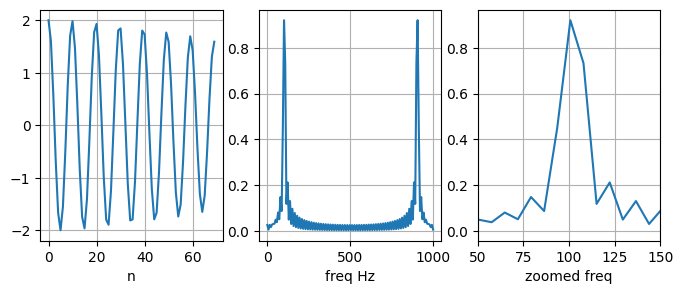

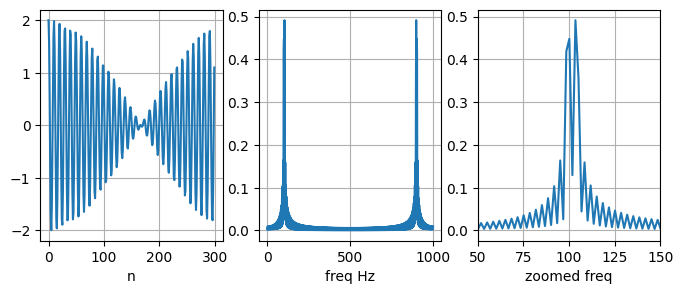

In [114]:
ventanas=[70,300,850,1333]

f0=100
f1=103
fs=1000

for ventana in ventanas:

    n=np.arange(ventana)
    
    x= np.cos(2*np.pi*f0/fs*n)+ np.cos(2*np.pi*f1/fs*n) #suma de 2 senos de 100 y 100 Hz

    X=np.fft.fft(x,n=ventana*2) # el segundo argumento es equivalente a realizar un zero-padding para completar 1000 muestras
    freq=np.linspace(0,fs,len(X))

    fig, ax=plt.subplots(1,3,figsize=(8,3))

    ax[0].plot(x)
    ax[1].plot(freq,abs(X)/len(x))
    ax[2].plot(freq,abs(X)/len(x))
    ax[2].set_xlim(50,150)

    ax[0].set_xlabel("n")
    ax[1].set_xlabel("freq Hz")
    ax[2].set_xlabel("zoomed freq")

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    plt.show()

In [154]:
Fs = 20 # Frecuencia de muestreo
f0 = 1.2345 # Frecuencia fundamental
t = np.arange(-10, 10, step=1/Fs)
s = np.cos(2*np.pi*f0*t)
f = scipy.fft.rfftfreq(n=len(s), d=1/Fs)

def rectangulo(t, T):
    w = np.zeros_like(t)
    w[np.absolute(t) < T/2] = 1.
    return w

p = []
for T in [15, 10, 5, 2]: # Duración de la ventana
    sT = s*rectangulo(t, T)
    ST = np.absolute(scipy.fft.rfft(sT))
    p.append(hv.Curve((t, sT), 'Tiempo [s]', 'Señal'))
    p.append(hv.Curve((f, ST), 'Frecuencia [Hz]', 'Espectro'))

hv.Layout(p).cols(2).opts(hv.opts.Curve(width=300, height=200))


:Layout
   .Curve.I    :Curve   [Tiempo [s]]   (Señal)
   .Curve.II   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.III  :Curve   [Tiempo [s]]   (Señal)
   .Curve.IV   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.V    :Curve   [Tiempo [s]]   (Señal)
   .Curve.VI   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.VII  :Curve   [Tiempo [s]]   (Señal)
   .Curve.VIII :Curve   [Frecuencia [Hz]]   (Espectro)

La aparición de los lóbulos laterales por truncamiento de la señal es un efecto que se conoce como **fuga espectral** (en inglés *spectral leak*)

La fuga espectral es una redistribución de la energía de un cierto componente espectral hacia sus frecuencias vecinas debido a las **discontinuidades o quiebres** en la periodicidad de la señal 

Observe a continuación la diferencia entre el espectro de una señal donde su periodicidad calza perfecto con la ventana (fila superior) versus cuando esto no ocurre, que sería el caso más general (fila inferior)

In [155]:
Fs, T = 20, 2
t = np.arange(-T, T, step=1/Fs)
f = scipy.fft.rfftfreq(n=len(t), d=1/Fs)
f_os = scipy.fft.rfftfreq(n=len(t)*10, d=1/Fs)

p = []
for f0 in [2.0, 2.15]: # Frecuencia fundamental    
    sT = np.cos(2*np.pi*f0*t)    
    ST = np.absolute(scipy.fft.rfft(sT))   
    ST_os = np.absolute(scipy.fft.rfft(sT, n=len(sT)*10)) 
    
    p.append(hv.Curve((t, sT), 'Tiempo [s]', 'Señal'))
    p.append(hv.Curve((f, ST), 'Frecuencia [Hz]', 'Espectro') * hv.Curve((f_os, ST_os)).opts(alpha=0.25, color='k'))

hv.Layout(p).cols(2).opts(hv.opts.Curve(width=300, height=200))

:Layout
   .Curve.I    :Curve   [Tiempo [s]]   (Señal)
   .Overlay.I  :Overlay
      .Curve.I  :Curve   [Frecuencia [Hz]]   (Espectro)
      .Curve.II :Curve   [x]   (y)
   .Curve.II   :Curve   [Tiempo [s]]   (Señal)
   .Overlay.II :Overlay
      .Curve.I  :Curve   [Frecuencia [Hz]]   (Espectro)
      .Curve.II :Curve   [x]   (y)

* El inicio y término de la primera señal están conectados y su espectro tiene un lóbulo principal delgado (bien definido)

* El inicio y término de la segunda señal no es conectan y su espectro tiene un lóbulo principal grueso debido a la fuga de energía en sus vecinos

La fuga espectral es indeseada ya que no aporta información real. Podemos disminuir este efecto si hacemos que los bordes de la señal “calcen” antes de calcular su espectro. Este proceso de suavizado de bordes se llama enventanado

Siempre hay que tener en cuenta que aplicar 

## Enventanado 

Es el proceso de multiplicar la señal por una ventana para alterar las características de su espectro. Lamentablemente no es posible eliminar la fuga espectral completamente con enventanado pero si podemos modificar como se redistribuye la energía

Existen muchas ventanas y cada una representa un compromiso (*trade-off*) distinto entre la <font color="0000BB"> afinar el lóbulo principal</font> y la <font color="BB0000">atenuación de los lóbulos laterales</font>

En general se tiene que

- Mientras más abrupto es el corte de la ventana, más fino y con mejores caracteristicas para diferenciar frecuencias vecinas.
- Mientras más suave sea la ventana, menos concentrado será el lóbulo principal y más débiles serán los lóbulos laterales lo que permitirá obsevar mejor frecuencias enmascaradas por los lóbulos

Revisemos a continuación algunas ventanas (columna de la izquierda), su efecto al multiplicar con la señal (columna central) y en el espectro resultante (columna derecha)

In [157]:
from scipy.signal import cosine, blackman, tukey

f0, Fs, T = 2.15, 20, 2
t = np.arange(-T, T, step=1/Fs)
sT = np.cos(2*np.pi*f0*t)
f_os = scipy.fft.rfftfreq(n=len(t)*10, d=1/Fs)
rect = lambda N: np.ones(shape=(N,))

p = []   
for window_fn in [rect, tukey, cosine, blackman]:
    w = window_fn(len(sT))    
    ST_os = np.absolute(scipy.fft.rfft(sT*w, n=len(sT)*10))    
    
    p.append(hv.Curve((t, w), 'Tiempo [s]', 'Ventana'))
    p.append(hv.Curve((t, sT*w), 'Tiempo [s]', 'Señal enventanada'))
    p.append(hv.Curve((f_os, ST_os), 'Frecuencia [Hz]', 'Espectro'))
    
hv.Layout(p).cols(3).opts(hv.opts.Curve(width=280, height=200))

:Layout
   .Curve.I    :Curve   [Tiempo [s]]   (Ventana)
   .Curve.II   :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.III  :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.IV   :Curve   [Tiempo [s]]   (Ventana)
   .Curve.V    :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.VI   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.VII  :Curve   [Tiempo [s]]   (Ventana)
   .Curve.VIII :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.IX   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.X    :Curve   [Tiempo [s]]   (Ventana)
   .Curve.XI   :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.XII  :Curve   [Frecuencia [Hz]]   (Espectro)

Las ventanas espectrales más utilizadas están implementadas en el módulo scipy.signal

En el ejemplo anterior usamos la ventana

* **Rectangular**: Borde con discontinuidad fuerte, es la que tiene más concentración de lóbulo principal pero también más lóbulos laterales

* **Tukey** con parámetro α=0.5
, es una transición entre la ventana rectangular y la ventana coseno

* **Cosine**, como su nombre lo indica tiene forma de coseno en [−π/2,π/2]

* **Blackman**: Borde muy suave, es la que tiene menos concentración de lóbulo principal pero también menos lóbulos laterales

Otra ventana interesante es la **“ventana de Kaiser”** cuyo parámetro β
 le permite asemejarse a otros ventanas de forma similar a la ventana de Tukey pero más flexible

β=0
: ventana rectangular

β=5
: similar a ventana coseno

β=8.8
 similar a la ventana de Blackman

Ejemplo a continuación

In [158]:
from scipy.signal import kaiser

f0, Fs, T = 2.15, 20, 2
t = np.arange(-T, T, step=1/Fs)
sT = np.cos(2*np.pi*f0*t)
f_os = scipy.fft.rfftfreq(n=len(t)*10, d=1/Fs)

p = []    
for beta in [0, 5, 8.8]:
    w = kaiser(len(sT), beta=beta)    
    ST = np.absolute(scipy.fft.rfft(sT*w, n=len(t)*10))
    
    p.append(hv.Curve((t, w), 'Tiempo [s]', 'Ventana'))
    p.append(hv.Curve((t, sT*w), 'Tiempo [s]', 'Señal enventanada'))
    p.append(hv.Curve((f_os, ST_os), 'Frecuencia [Hz]', 'Espectro'))
    
hv.Layout(p).cols(3).opts(hv.opts.Curve(width=280, height=200))

:Layout
   .Curve.I    :Curve   [Tiempo [s]]   (Ventana)
   .Curve.II   :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.III  :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.IV   :Curve   [Tiempo [s]]   (Ventana)
   .Curve.V    :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.VI   :Curve   [Frecuencia [Hz]]   (Espectro)
   .Curve.VII  :Curve   [Tiempo [s]]   (Ventana)
   .Curve.VIII :Curve   [Tiempo [s]]   (Señal enventanada)
   .Curve.IX   :Curve   [Frecuencia [Hz]]   (Espectro)

Lo que vemos a la hora de plotear la transformada rapida de fourier es siempre una unica repeticion del espectro ubicada entre $[0:2\pi)$

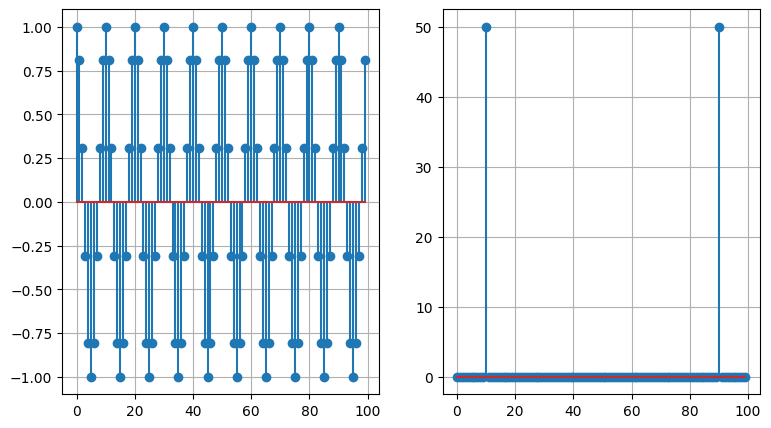

In [134]:
n=np.arange(100)

f0=100
fs=1000

x= np.cos(2*np.pi*f0/fs*n)

X=np.fft.fft(x) # el segundo argumento es equivalente a realizar un zero-padding para completar 1000 muestras

fig, ax=plt.subplots(1,2, figsize=(9,5))

ax[0].stem(x)
ax[1].stem(abs(X))

ax[0].grid()
ax[1].grid()
plt.show()

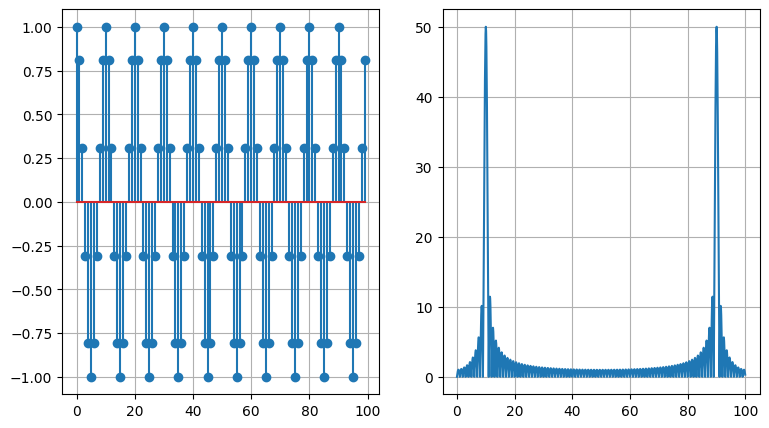

In [137]:
Xpad=np.fft.fft(x,1000)
padfrec=np.linspace(0,100,len(Xpad))

fig, ax=plt.subplots(1,2, figsize=(9,5))

ax[0].stem(x)
ax[1].plot(padfrec,abs(Xpad))

ax[0].grid()
ax[1].grid()
plt.show()

Basicamente las trasformada discreta de fourier esta generando un muestreo del espectro, como vemos en el ejemplo proximo

(0.0, 20.0)

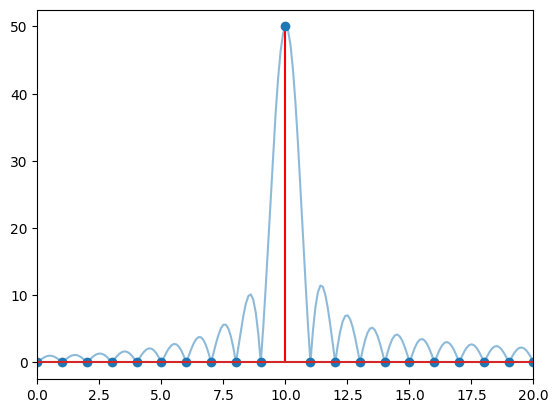

In [146]:
plt.plot(padfrec,abs(Xpad),alpha=0.5)
plt.stem(abs(X),"r")
plt.xlim(0,20)

(-50.0, 1.0)

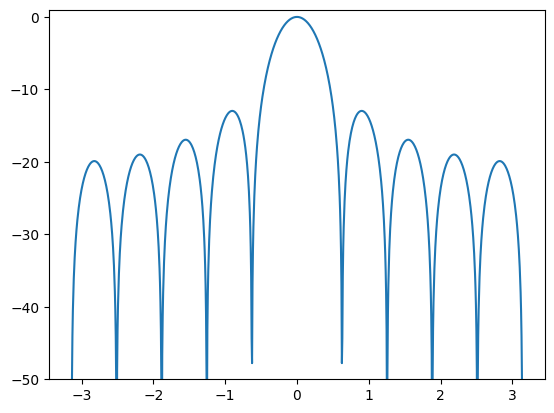

In [52]:
omega= np.linspace(-np.pi,np.pi,1000)
N=10
sinn=np.sin((omega*N)/2)
sind=np.sin((omega)/2)

W=np.abs(sinn/sind)
W=W/max(W)

plt.plot(omega,20*np.log10(W))
#plt.xlim(-1.5,1.5)
plt.ylim(-50,1)

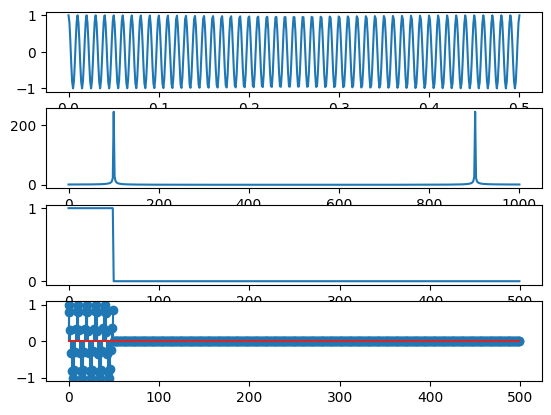

In [18]:
f0=100
fs=1000
tf=0.5 #segundos

t=np.linspace(0,tf,int(tf*fs))
x=np.cos(np.pi*2*f0*t)
rectangular= np.zeros(len(x))
rectangular[0:50]=1

X=np.fft.fft(x)
freqs= np.linspace(0,fs,len(x))
fig,ax=plt.subplots(4)
ax[0].plot(t,x)
ax[1].plot(freqs,np.abs(X))
ax[2].plot(rectangular)
ax[3].stem(rectangular*x)
#ax[2].plot(np.arctan(np.imag(X)/np.real(X)))

#ax[0].set_xlim(0,0.3)
#ax[3].set_xlim(0,100)
plt.show()


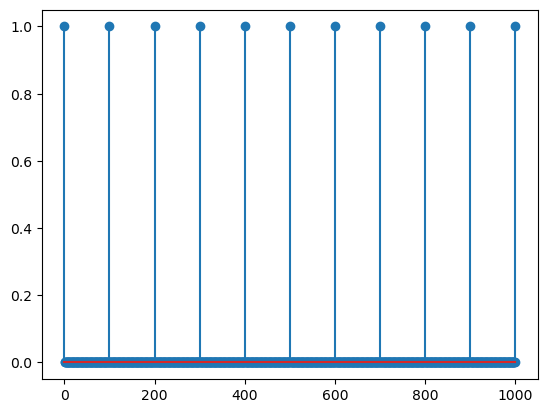

In [89]:
x2=np.zeros(1001)
x2[::100]=1
plt.stem(x2)
plt.show()

C:\Users\Anonymous\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


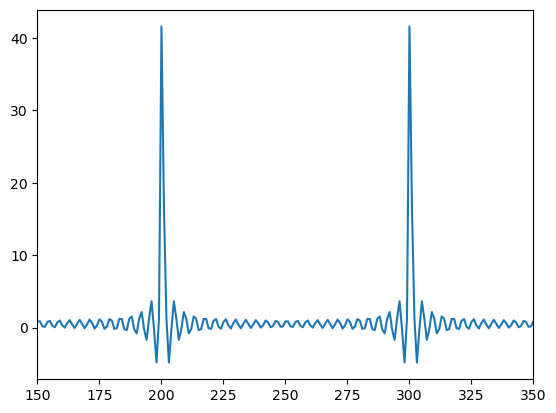

In [94]:
plt.plot(np.convolve(X,x2))
plt.xlim(150,350)
plt.show()

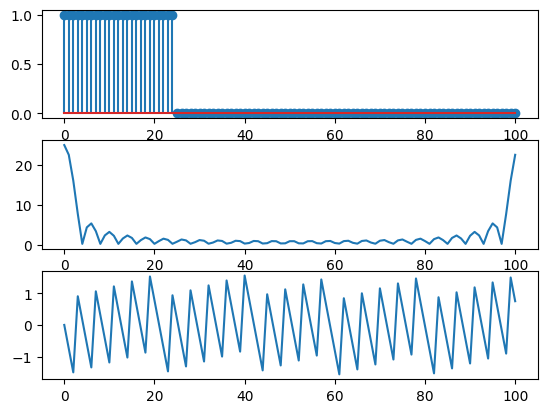

In [19]:
x=np.ones(101)
x[25:]=0

X=np.fft.fft(x)

fig,ax=plt.subplots(3)
ax[0].stem(x)
ax[1].plot(np.abs(X))
ax[2].plot(np.arctan(np.imag(X)/np.real(X)))


plt.show()

In [51]:
%matplotlib QT5
V_Rec=np.ones(51)
V_Rec[25:]=0
W=np.fft.fft(V_Rec)
W=np.roll(W,25)

#plt.plot(W)

x2=np.zeros(1001)
x2[15::100]=0.5
x2[85::100]=0.5
#plt.stem(x2)
#plt.show()



xtrunc=np.convolve(np.abs(W)/np.max(np.abs(W)),x2)

plt.plot(xtrunc)
plt.show()